# Homework 2

In [ ]:
import pandas as pd
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt

# Apartment Prices

In [ ]:
# Load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/Booli_sold.csv")
# Create a subset of data with only the specified columns
selected_columns = ['listPrice', 'rent', 'livingArea', 'rooms', 
                    'constructionYear', 'soldDate', 'soldPrice']
display_data = data[selected_columns].copy()

# Display the formatted subset of data
print("Relevant Data:")
display_data.head(5)

In [60]:
# Calculate price per square meter and add as a new column "ppsqm"
data['ppsqm'] = data['soldPrice'] / data['livingArea']

print("Calculated Price per Square Meter:")
data[['soldPrice', 'livingArea', 'rooms', 'ppsqm']].head(5)

Calculated Price per Square Meter:


,soldPrice,livingArea,rooms,ppsqm
0,3820000,73.0,3.0,52328.767123
1,2355000,36.0,1.0,65416.666667
2,6110000,81.0,3.0,75432.098765
3,8050000,107.0,4.0,75233.644860
4,2400000,29.0,1.0,82758.620690
5,8950000,125.0,4.0,71600.000000
6,4200000,79.2,3.0,53030.303030
7,3300000,64.3,2.0,51321.928460
8,3150000,64.3,2.0,48989.113530
9,5400000,96.0,3.0,56250.000000


In [48]:
# Step 2: Rank the top 5 most expensive apartments by ppsqm
top_5_expensive = data.sort_values(by='ppsqm', ascending=False).head(5)

print("Top 5 most expensive apartments by price per square meter (ppsqm):")
top_5_expensive[['soldPrice', 'livingArea', 'ppsqm']]

Top 5 most expensive apartments by price per square meter (ppsqm):


,soldPrice,livingArea,ppsqm
67,2500000,24.0,104166.666667
50,2450000,24.0,102083.333333
54,2300000,23.0,100000.000000
34,2210000,25.0,88400.000000
55,2300000,26.9,85501.858736


In [49]:
# Step 3: Calculate the average ppsqm in Ekhagen
average_ppsqm = data['ppsqm'].mean()
print(f"\nAverage price per square meter in Ekhagen: {average_ppsqm:.2f} SEK")


Average price per square meter in Ekhagen: 58759.38 SEK


In [51]:
# Step 4:Analyze the relationship between apartment size and ppsqm
average_ppsqm_by_rooms = data.groupby('rooms')['ppsqm'].mean()
print("\nAverage price per square meter by number of rooms:")
average_ppsqm_by_rooms


Average price per square meter by number of rooms:


rooms
1.0    74262.543867
1.5    61155.237123
2.0    57144.346102
2.5    59535.081257
3.0    52666.748396
3.5    52717.033944
4.0    57793.629102
4.5    47587.719298
5.0    56960.910745
6.0    46849.689925
Name: ppsqm, dtype: float64

In [28]:
text = "From the data, we can see that the price per square meter (ppsqm) tends to decrease as the number of rooms increases. Apartments with only one room have a higher ppsqm, which suggests that smaller apartments are often more expensive per square meter. This could be because smaller apartments are popular among young people and students, while larger apartments offer better value per square meter despite a higher total price."
print(text)

From the data, we can see that the price per square meter (ppsqm) tends to decrease as the number of rooms increases. Apartments with only one room have a higher ppsqm, which suggests that smaller apartments are often more expensive per square meter. This could be because smaller apartments are popular among young people and students, while larger apartments offer better value per square meter despite a higher total price.


# The Swedish Election of 2018

In [55]:
# Load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/2018_R_per_kommun.csv", sep=';', decimal=',')
data.head(10)

,LÄNSKOD,KOMMUNKOD,LÄNSNAMN,KOMMUNNAMN,M,C,L,KD,S,V,...,TRP,VL-S,ÖVR,OGEJ,BLANK,OG,RÖSTER GILTIGA,RÖSTANDE,RÖSTBERÄTTIGADE,VALDELTAGANDE
0,1,14,Stockholms län,Upplands Väsby,23.11,6.26,5.66,6.71,26.97,8.01,...,NaN,NaN,NaN,0.04,0.69,0.06,25830,26036,30740,84.70
1,1,15,Stockholms län,Vallentuna,28.29,10.11,7.73,7.58,18.91,4.47,...,0.0,NaN,0.00,0.02,0.59,0.08,20952,21099,23438,90.02
2,1,17,Stockholms län,Österåker,29.68,9.35,7.48,7.13,19.71,4.97,...,NaN,NaN,0.01,0.03,0.69,0.13,27711,27947,31309,89.26
3,1,20,Stockholms län,Värmdö,27.49,9.76,6.40,5.89,20.48,6.02,...,NaN,NaN,0.01,0.04,0.67,0.07,28115,28335,31371,90.32
4,1,23,Stockholms län,Järfälla,23.96,6.31,6.04,6.29,27.68,8.75,...,0.0,NaN,0.02,0.04,0.53,0.07,45654,45948,53230,86.32
5,1,25,Stockholms län,Ekerö,28.12,11.24,7.64,7.85,17.17,4.76,...,NaN,NaN,0.01,0.01,0.64,0.08,17814,17946,19472,92.16
6,1,26,Stockholms län,Huddinge,24.07,7.52,6.14,5.35,26.10,8.63,...,NaN,NaN,0.01,0.04,0.58,0.07,61440,61869,72839,84.94
7,1,27,Stockholms län,Botkyrka,18.52,5.19,4.39,8.13,32.34,9.85,...,NaN,NaN,0.06,0.03,0.64,0.05,45393,45719,58436,78.24
8,1,28,Stockholms län,Salem,24.84,7.61,7.58,7.98,23.07,5.98,...,NaN,NaN,NaN,0.04,0.75,0.02,9985,10066,11463,87.81
9,1,36,Stockholms län,Haninge,22.94,6.06,5.11,5.36,27.29,7.99,...,0.0,NaN,0.01,0.05,0.79,0.05,50484,50940,59890,85.06


In [54]:
# Filter data for municipalities in Stockholm County
stockholm_data = data[data['LÄNSNAMN'] == 'Stockholms län']

#Sum the number of legitimate votes (RÖSTER GILTIGA) for all municipalities in Stockholm
total_legitimate_votes = stockholm_data['RÖSTER GILTIGA'].sum()

#Print the result
print(f"Total number of legitimate votes in Stockholm: {total_legitimate_votes}")


Total number of legitimate votes in Stockholm: 1426237


In [162]:
#Find the highest vote percentage for S
max_s_votes = data['S'].max() 
#Find the municipality with that max value
municipality_max_s = data[data['S'] == max_s_votes]['KOMMUNNAMN'].values[0] 
print(f"The municipality where Socialdemokraterna (S) garnered the highest voting percentage is: {municipality_max_s} with {max_s_votes}%")

The municipality where Socialdemokraterna (S) garnered the highest voting percentage is: Munkfors with 52.18%


In [17]:
#Sort the data by 'VALDELTAGANDE' column in descending order
top_3_municipalities = data[['KOMMUNNAMN', 'VALDELTAGANDE']].sort_values(by='VALDELTAGANDE', ascending=False).head(3)

#Print the table of the top 3 municipalities with the highest voter participation
top_3_municipalities

,KOMMUNNAMN,VALDELTAGANDE
103,Lomma,93.86
59,Habo,93.35
98,Vellinge,93.13


# Predicting Strokes

In [2]:
import pandas as pd
# Load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/stroke-data.csv")
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


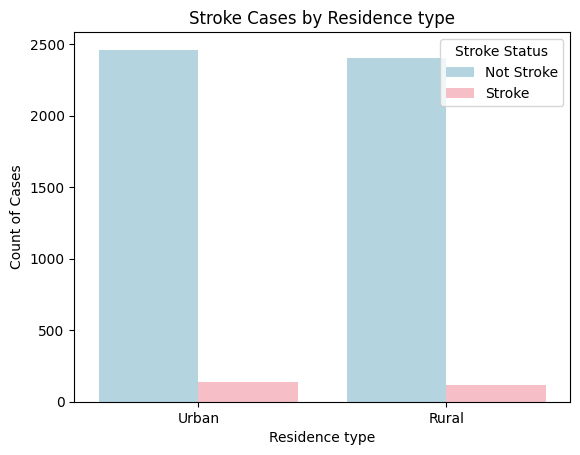

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot: Stroke distribution by gender
sns.countplot(data=data, x='Residence_type', hue='stroke', palette={0: 'lightblue', 1: 'lightpink'})
plt.title('Stroke Cases by Residence type')
plt.xlabel('Residence type')
plt.ylabel('Count of Cases')
# Customizing legend labels
plt.legend(title='Stroke Status', labels=['Not Stroke', 'Stroke'])
plt.show()

boende_count = data['Residence_type'].value_counts()
print(boende_count)

In [7]:
text = "The nearly equal distribution of people in urban (2596) and rural (2514) areas suggests that residence location may not significantly impact stroke risk, as there is no notable difference between the two groups."
print(text)

The nearly equal distribution of people in urban (2596) and rural (2514) areas suggests that residence location may not significantly impact stroke risk, as there is no notable difference between the two groups.
